# Kymograph and Force


We have two beads trapped and a DNA attached to both of them at either end. We made sure that we have a single tether of DNA by pulling on them before and doing the FD curve.

We then moved into the channel that contains Sytox-Green. It binds to DNA if the DNA is under tension. We can the scan along the DNA and create kymographs using the confocal part of the system.

As we start the kymographs, we can change the force on the DNA and observe the force dependent binding of Sytox to DNA.

This experiments perfectly demonstrates the correlative capabilities of the C-trap.



In [103]:
"""  Install Pylake, in case it's not installed """
# !pip install lumicks.pylake

"  Install Pylake, in case it's not installed "

In [104]:
import numpy as np
from lumicks import pylake
import matplotlib.pyplot as plt

In [105]:
""" Open the file """

# Sytox binding, unbinding, with decreased, than increased force
filename = "20181107-152940 Sytox kymograph 7.h5"

# load file
data = pylake.File(filename)

In [106]:
""" Look at the contents of the file """

print(file)

File root metadata:
- Bluelake version: 1.5.0-alpha.35
- Description: 
- Experiment: 
- GUID: {30C83182-2488-4B27-9EBE-60530CC12D0C}
- Export time (ns): 1541600980363255800
- File format version: 1

Calibration:
  14:
    Force 1x
    Force 1y
    Force 2x
    Force 2y
    JSON:
    - Data type: object
    - Size: 1
Distance:
  Distance 1:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 972
  Distance 2:
  - Data type: [('Timestamp', '<i8'), ('Value', '<f8')]
  - Size: 972
Force HF:
  Force 1x:
  - Data type: float64
  - Size: 5059376
  Force 1y:
  - Data type: float64
  - Size: 5059376
  Force 2x:
  - Data type: float64
  - Size: 5059376
  Force 2y:
  - Data type: float64
  - Size: 5059376
Info wave:
  Info wave:
  - Data type: uint8
  - Size: 5059376
Kymograph:
  7:
  - Data type: object
  - Size: 1
Photon count:
  Blue:
  - Data type: uint32
  - Size: 5059376
  Green:
  - Data type: uint32
  - Size: 5059376
  Red:
  - Data type: uint32
  - Size: 5059376



## Make Kymographs

In [107]:
""" List all the kymographs in the file """

for kymo_name in file.kymos:
    print(kymo_name)

7


In [108]:
""" Load the kymograph in the file """

# you can either do this and then you have to change which kymo you load for every file:
kymo_data = file.kymos["7"] # as this file contains kymograph #7

# ALTERNATIVELY you can either do this and then you don't have to worry about which file you open
kymos = list(file.kymos)
kymo_data = file.kymos[kymos[0]]


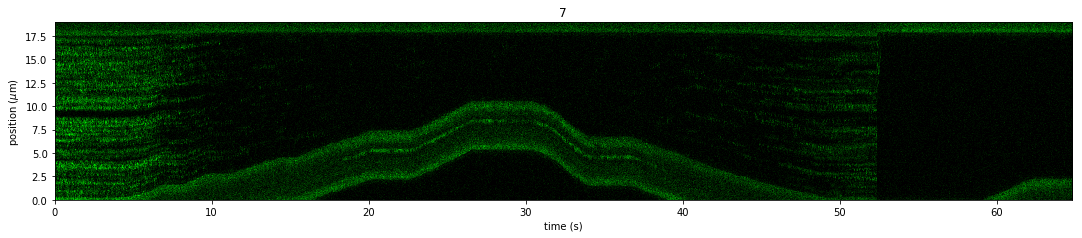

In [109]:
""" Plot the red channel """

fig = plt.figure(figsize=(15,10))

# here you select the kymo
kymo = file.kymos["7"]
kymo.plot_green()
plt.tight_layout()

plt.savefig("../../docs/examples_by_segments/dna_rna-protein_force_kymograph1.png")

Note that we can also scale the colorbar of the image.

This is not so straightforward, here we just show a very simple way of doing it.

In [110]:
""" Get the raw data out of the kymographs """

blue_date = kymo.blue_image
green_date = kymo.green_image
red_date = kymo.red_image

# this gives you the timestamps if you want to produce the kymos yourself
timestamps = kymo.timestamps

In [111]:
""" Get a sense of the pixel values in the kymos """

max_px = np.max(green_date)
min_px = np.min(green_date)

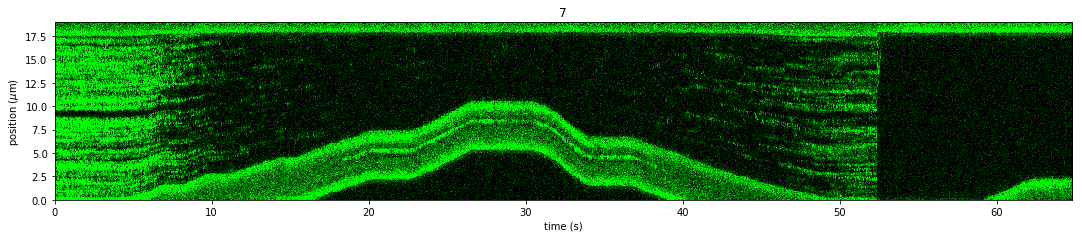

In [112]:
""" Scale the colorbar and make the kymograph look better """

fig = plt.figure(figsize=(15,10))

file.kymos["7"].plot_green(vmax=10)
plt.tight_layout()

plt.savefig("../../docs/examples_by_segments/dna_rna-protein_force_kymograph2.png")

## Force versus Time

In [113]:
""" Load the data """

# Force in the x direction (pN)
forcex = data['Force HF']['Force 1x']

# time traces (seconds)
time = forcex.timestamps/1e9
time = time - time[0]

sample_rate = forcex.sample_rate


In [114]:
""" Downsample the data """

downsampled_rate = 100 # Hz

# downsample the force, nanostage position and time
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcex_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]


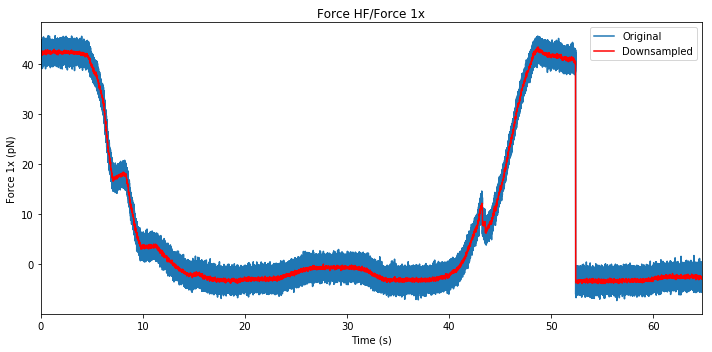

In [115]:
fig = plt.figure(figsize=(10,5))

forcex.plot(label="Original")
forcex_downsamp.plot(color='r',label="Downsampled")
plt.ylabel('Force 1x (pN)')
plt.xlim([0,max(time)])
plt.legend()
plt.tight_layout()

plt.savefig("../../docs/examples_by_segments/dna_rna-protein_force_kymograph3.png")

## Correlated Force and Confocal

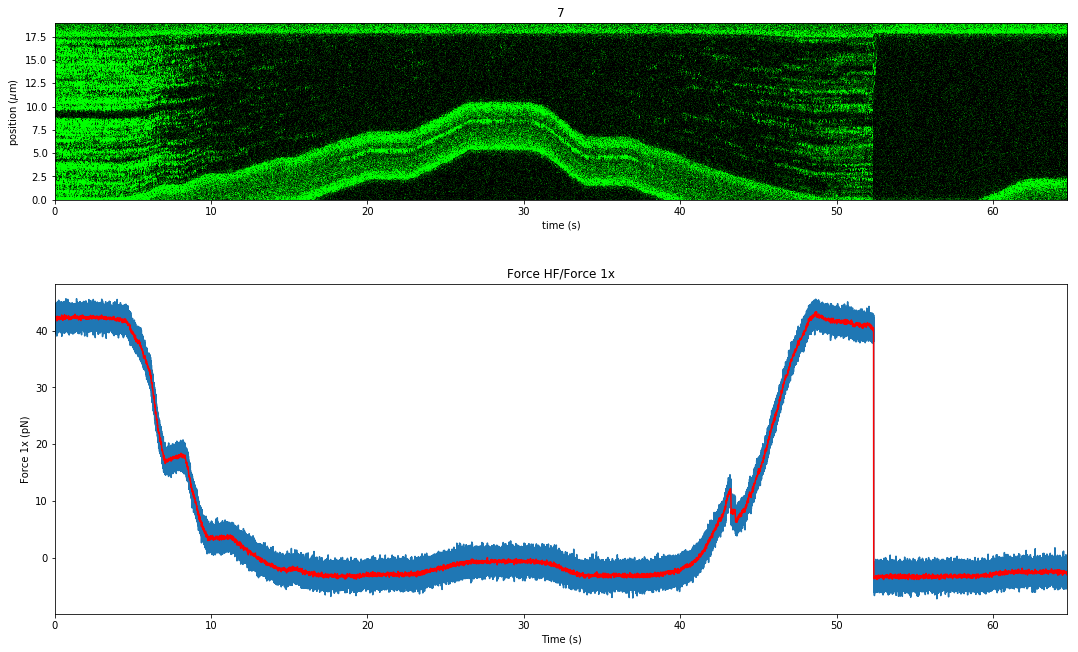

In [116]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
file.kymos["7"].plot_green(vmax=10)


plt.subplot(2,1,2)
forcex.plot(label="Original")
forcex_downsamp.plot(color='r',label="Downsampled")
plt.xlim([0,max(time)])
plt.ylabel('Force 1x (pN)')
plt.tight_layout()

plt.savefig("../../docs/examples_by_segments/dna_rna-protein_force_kymograph4.png")

We see when we decreased the force on the DNA the Sytox unbound. As soon as we increase the tension back, we see Sytox binding again. At around 52 seconds, the DNA tether broke, which is why the force went back to it's original position.